In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data['Sales'].values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

## Converting the Sales Target Variable into the Categorical Variables ##

In [6]:
data['Sales'] = pd.cut(np.array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=["Low","Medium","High"])

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder1= LabelEncoder()
data['ShelveLoc'] = encoder1.fit_transform(data['ShelveLoc'])
data['Urban']=encoder1.fit_transform(data['Urban'])
data['US']= encoder1.fit_transform(data['US'])

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,Medium,139,23,3,37,120,2,55,11,0,1
397,Medium,162,26,12,368,159,2,40,18,1,1
398,Medium,100,79,7,284,95,0,50,12,1,1


In [10]:
#Splitting the data into train test data
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [11]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [12]:
y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [14]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((268, 10), (132, 10), (268,), (132,))

## Checking for Entopy criteria ##

In [15]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

[Text(167.4, 190.26, 'X[5] <= 0.5\nentropy = 1.326\nsamples = 268\nvalue = [33, 74, 161]'),
 Text(83.7, 135.9, 'X[4] <= 93.0\nentropy = 1.029\nsamples = 65\nvalue = [1, 42, 22]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 69.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 1, 10]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.439\nsamples = 11\nvalue = [0, 1, 10]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 136.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.881\nsamples = 40\nvalue = [0, 28, 12]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 1.5\nentropy = 1.214\nsamples = 203\nvalue = [32, 32, 139]'),
 Text(209.25, 81.53999999999999, 'X[4] <= 121.5\nentropy = 1.178\nsamples = 57\nvalue = [25, 2, 30]'),
 Text(188.32500000000002, 27.18000000

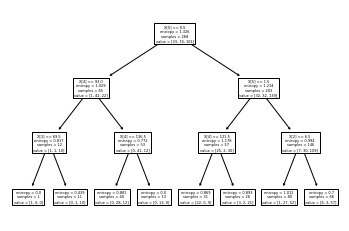

In [16]:
tree.plot_tree(model)

[Text(465.0, 792.75, 'ShelveLoc <= 0.5\nentropy = 1.326\nsamples = 268\nvalue = [33, 74, 161]\nclass = Low'),
 Text(232.5, 566.25, 'Price <= 93.0\nentropy = 1.029\nsamples = 65\nvalue = [1, 42, 22]\nclass = High'),
 Text(116.25, 339.75, 'Population <= 69.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 1, 10]\nclass = Low'),
 Text(58.125, 113.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Medium'),
 Text(174.375, 113.25, 'entropy = 0.439\nsamples = 11\nvalue = [0, 1, 10]\nclass = Low'),
 Text(348.75, 339.75, 'Price <= 136.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]\nclass = High'),
 Text(290.625, 113.25, 'entropy = 0.881\nsamples = 40\nvalue = [0, 28, 12]\nclass = High'),
 Text(406.875, 113.25, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]\nclass = High'),
 Text(697.5, 566.25, 'ShelveLoc <= 1.5\nentropy = 1.214\nsamples = 203\nvalue = [32, 32, 139]\nclass = Low'),
 Text(581.25, 339.75, 'Price <= 121.5\nentropy = 1.178\nsamples = 57\nvalue = [25, 2, 30]\nclass = L

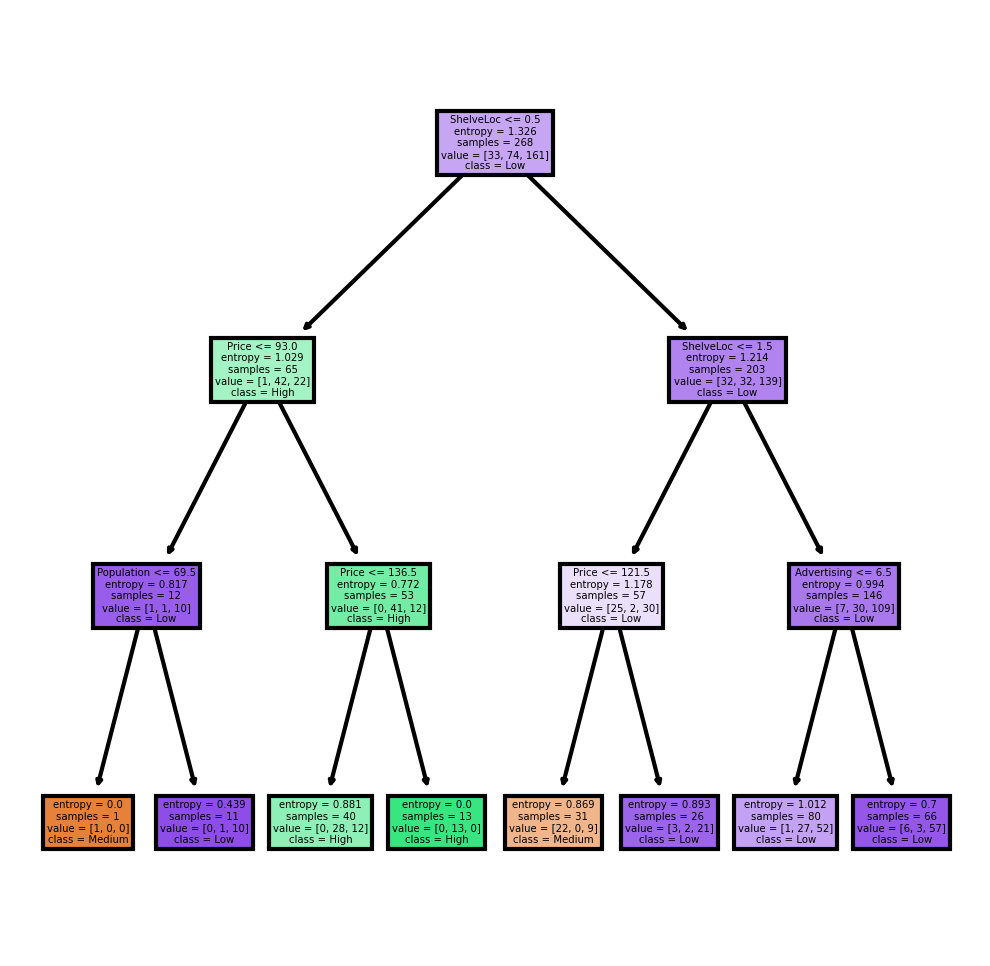

In [17]:
fn = ['ComPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Medium','High','Low']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,
              class_names=cn,
              filled = True)

In [18]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
     

In [19]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6136363636363636

In [20]:
count_misclassfied = (y_test != y_pred).sum()
count_misclassfied

51

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.36      0.22      0.28        18
         Low       0.46      0.39      0.42        28
      Medium       0.68      0.77      0.72        86

    accuracy                           0.61       132
   macro avg       0.50      0.46      0.47       132
weighted avg       0.59      0.61      0.60       132



## Checking the gini criteria ##

In [22]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=3)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

[Text(167.4, 190.26, 'X[5] <= 0.5\ngini = 0.548\nsamples = 268\nvalue = [33, 74, 161]'),
 Text(83.7, 135.9, 'X[4] <= 93.0\ngini = 0.468\nsamples = 65\nvalue = [1, 42, 22]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 69.5\ngini = 0.292\nsamples = 12\nvalue = [1, 1, 10]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.165\nsamples = 11\nvalue = [0, 1, 10]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 151.0\ngini = 0.35\nsamples = 53\nvalue = [0, 41, 12]'),
 Text(104.625, 27.180000000000007, 'gini = 0.315\nsamples = 51\nvalue = [0, 41, 10]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 1.5\ngini = 0.481\nsamples = 203\nvalue = [32, 32, 139]'),
 Text(209.25, 81.53999999999999, 'X[4] <= 107.5\ngini = 0.529\nsamples = 57\nvalue = [25, 2, 30]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.255\nsamples =

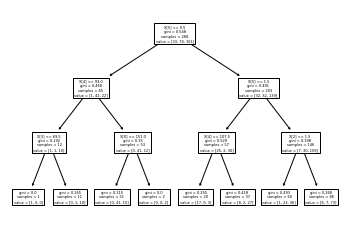

In [23]:
tree.plot_tree(model1)

[Text(465.0, 792.75, 'ShelveLoc <= 0.5\ngini = 0.548\nsamples = 268\nvalue = [33, 74, 161]\nclass = Low'),
 Text(232.5, 566.25, 'Price <= 93.0\ngini = 0.468\nsamples = 65\nvalue = [1, 42, 22]\nclass = High'),
 Text(116.25, 339.75, 'Population <= 69.5\ngini = 0.292\nsamples = 12\nvalue = [1, 1, 10]\nclass = Low'),
 Text(58.125, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Medium'),
 Text(174.375, 113.25, 'gini = 0.165\nsamples = 11\nvalue = [0, 1, 10]\nclass = Low'),
 Text(348.75, 339.75, 'ComPrice <= 151.0\ngini = 0.35\nsamples = 53\nvalue = [0, 41, 12]\nclass = High'),
 Text(290.625, 113.25, 'gini = 0.315\nsamples = 51\nvalue = [0, 41, 10]\nclass = High'),
 Text(406.875, 113.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Low'),
 Text(697.5, 566.25, 'ShelveLoc <= 1.5\ngini = 0.481\nsamples = 203\nvalue = [32, 32, 139]\nclass = Low'),
 Text(581.25, 339.75, 'Price <= 107.5\ngini = 0.529\nsamples = 57\nvalue = [25, 2, 30]\nclass = Low'),
 Text(523.125, 113.25, 'g

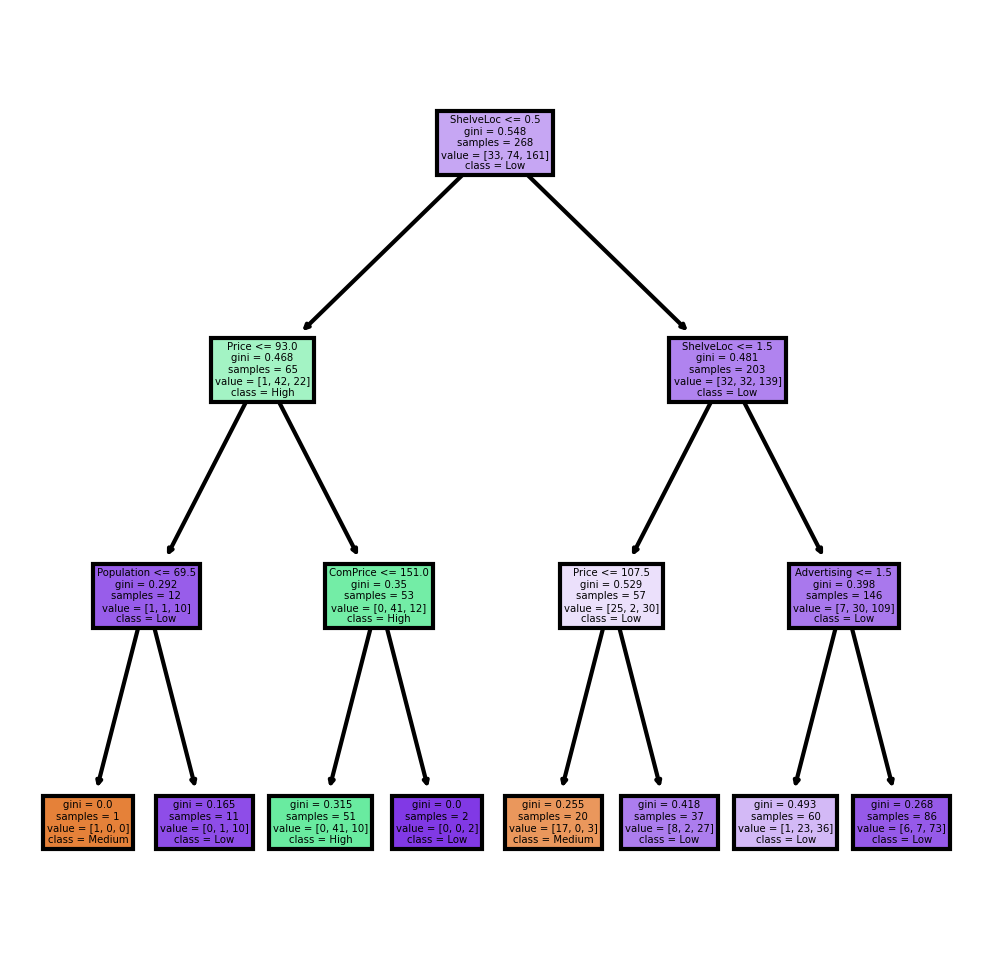

In [24]:
fn= ['ComPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Medium','High','Low']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model1,feature_names=fn,
              class_names=cn,
              filled=True)

In [25]:
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.6666666666666666

In [26]:
count_misclassified = (y_test != y_pred1).sum()
count_misclassified

44

In [27]:
pd.crosstab(y_test,y_pred1)

col_0,High,Low,Medium
Sales,,,
Low,0,11,17
Medium,2,11,73
High,4,0,14


In [28]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

        High       0.67      0.22      0.33        18
         Low       0.50      0.39      0.44        28
      Medium       0.70      0.85      0.77        86

    accuracy                           0.67       132
   macro avg       0.62      0.49      0.51       132
weighted avg       0.65      0.67      0.64       132



In [29]:
data['Sales'] = encoder1.fit_transform(data['Sales'])

In [30]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,0,50,12,1,1


In [31]:
data = np.array(data)

In [32]:
x = data[:,1:]
y = data[:,0]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.33, random_state=10)

In [34]:
x_test

array([[106,  33,  20, ...,  12,   1,   1],
       [132, 118,  12, ...,  14,   1,   1],
       [133, 103,  14, ...,  17,   1,   1],
       ...,
       [108,  38,   0, ...,  14,   0,   0],
       [131, 113,   0, ...,  14,   1,   0],
       [125,  67,   0, ...,  11,   1,   0]], dtype=int64)

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
rmodel= DecisionTreeRegressor()
rmodel.fit(x_train,y_train)
y_predr = rmodel.predict(x_test)

[Text(177.69851097178685, 209.6742857142857, 'X[5] <= 1.5\nmse = 0.496\nsamples = 268\nvalue = 1.478'),
 Text(92.4898119122257, 194.14285714285714, 'X[4] <= 118.5\nmse = 0.594\nsamples = 122\nvalue = 1.213'),
 Text(46.17931034482759, 178.61142857142858, 'X[5] <= 0.5\nmse = 0.729\nsamples = 59\nvalue = 0.983'),
 Text(18.89153605015674, 163.07999999999998, 'X[6] <= 53.0\nmse = 0.307\nsamples = 30\nvalue = 1.4'),
 Text(8.396238244514107, 147.54857142857142, 'X[4] <= 113.0\nmse = 0.109\nsamples = 8\nvalue = 1.875'),
 Text(4.1981191222570535, 132.01714285714286, 'mse = 0.0\nsamples = 7\nvalue = 2.0'),
 Text(12.59435736677116, 132.01714285714286, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(29.386833855799374, 147.54857142857142, 'X[6] <= 77.0\nmse = 0.267\nsamples = 22\nvalue = 1.227'),
 Text(20.99059561128527, 132.01714285714286, 'X[3] <= 49.0\nmse = 0.184\nsamples = 16\nvalue = 1.062'),
 Text(16.792476489028214, 116.48571428571428, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(25.1887147

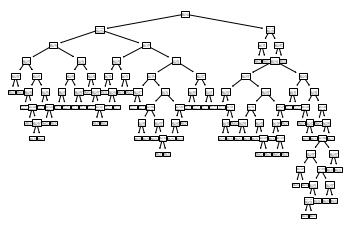

In [37]:
tree.plot_tree(rmodel)

[Text(493.60697492163007, 873.6428571428571, 'ShelveLoc <= 1.5\nmse = 0.496\nsamples = 268\nvalue = 1.478'),
 Text(256.91614420062695, 808.9285714285714, 'Price <= 118.5\nmse = 0.594\nsamples = 122\nvalue = 1.213'),
 Text(128.27586206896552, 744.2142857142858, 'ShelveLoc <= 0.5\nmse = 0.729\nsamples = 59\nvalue = 0.983'),
 Text(52.476489028213166, 679.5, 'Age <= 53.0\nmse = 0.307\nsamples = 30\nvalue = 1.4'),
 Text(23.322884012539184, 614.7857142857143, 'Price <= 113.0\nmse = 0.109\nsamples = 8\nvalue = 1.875'),
 Text(11.661442006269592, 550.0714285714287, 'mse = 0.0\nsamples = 7\nvalue = 2.0'),
 Text(34.98432601880877, 550.0714285714287, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(81.63009404388714, 614.7857142857143, 'Age <= 77.0\nmse = 0.267\nsamples = 22\nvalue = 1.227'),
 Text(58.307210031347964, 550.0714285714287, 'Population <= 49.0\nmse = 0.184\nsamples = 16\nvalue = 1.062'),
 Text(46.64576802507837, 485.3571428571429, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(69.96865203

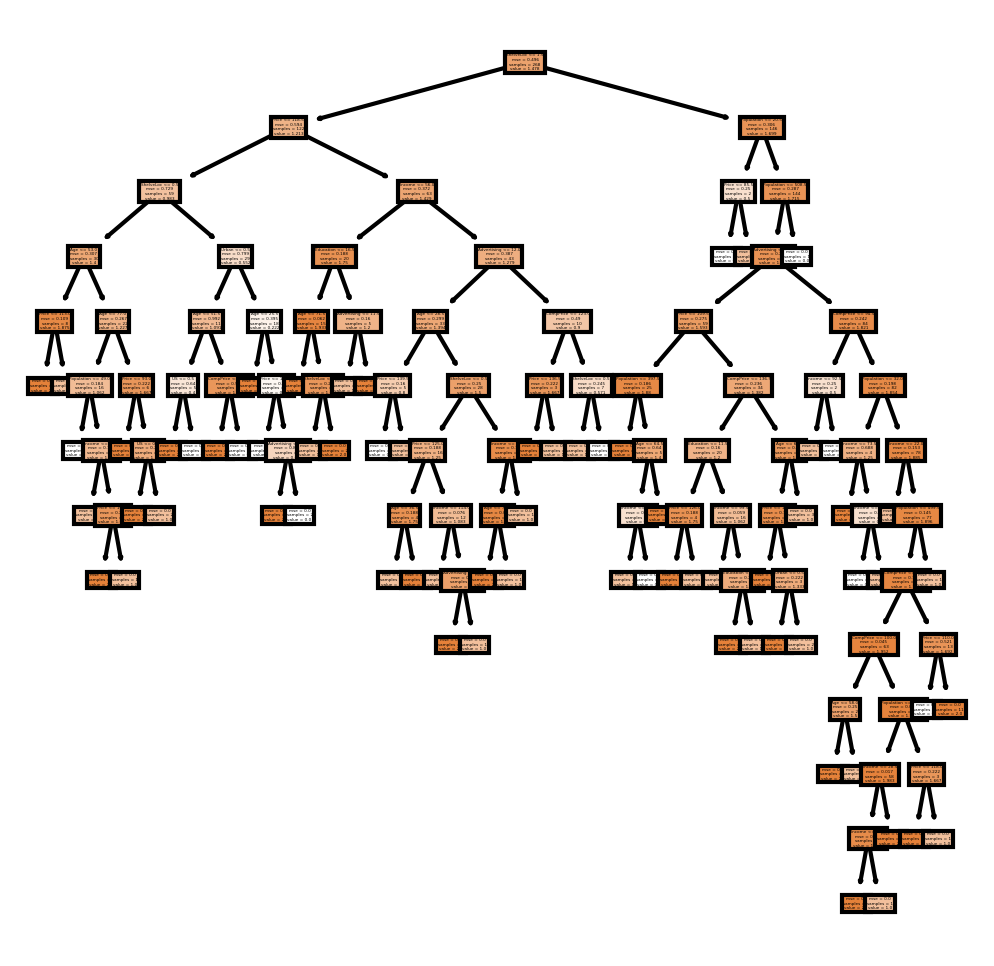

In [38]:
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Medium', 'High', 'Low']
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(rmodel,feature_names=fn,
               class_names=cn,
               filled= True)

In [39]:
y_predr

array([2., 2., 0., 1., 2., 2., 2., 2., 2., 2., 2., 0., 1., 2., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 1., 2., 1., 2., 2., 2., 1.,
       2., 1., 2., 1., 0., 2., 2., 1., 0., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 0., 2., 2., 2.,
       1., 2., 0., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1.])

In [41]:
accuracyr = accuracy_score(y_test,y_predr)
accuracyr

0.6363636363636364

In [42]:
count_misclassified =(y_test != y_predr).sum()
count_misclassified

48

In [44]:
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.55      0.33      0.41        18
           1       0.42      0.50      0.46        28
           2       0.73      0.74      0.74        86

    accuracy                           0.64       132
   macro avg       0.57      0.53      0.54       132
weighted avg       0.64      0.64      0.63       132

